In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.stats
import scipy.special
import scipy.integrate
import scipy.interpolate
from scipy import constants as consts
import cepheid_variables_functions as cv
import os

# Cepheids

AN_Aur_p.dat
SY_Cas_p.dat
.DS_Store
SY_Aur_p.dat
IN_Aur_p.dat
ER_Aur_p.dat
TT_Aql_p.dat
CH_Cas_p.dat
YZ_Aur_p.dat
FM_Aql_p.dat
KK_Cas_p.dat
U_Aql_p.dat
RY_Cas_p.dat
SW_Cas_p.dat
RX_Aur_p.dat
RS_Cas_p.dat
GV_Aur_p.dat
SZ_Aql_p.dat
VW_Cas_p.dat


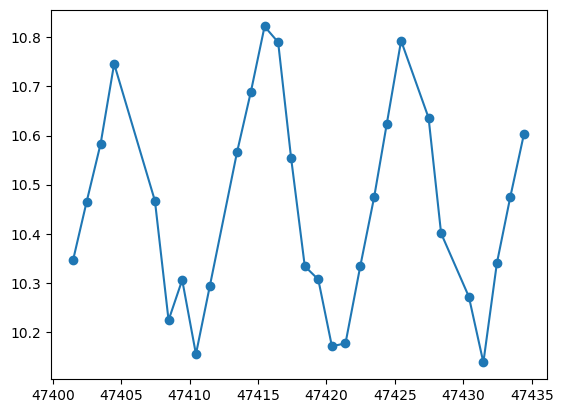

In [3]:
entries  = os.scandir('data_files/')
for entry in entries:
    print(entry.name)


AN_Aur = np.loadtxt('data_files/AN_Aur_p.dat', unpack = True, usecols = [0,1])
plt.figure()
plt.plot(AN_Aur[0],AN_Aur[1],'o-')
plt.show()


AN_Aur_time = AN_Aur[0]
AN_Aur_mag = AN_Aur[1]

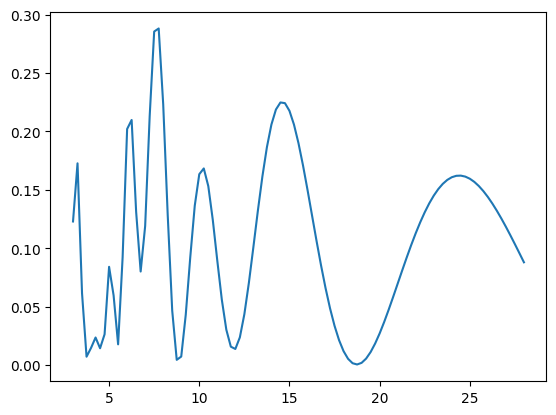

In [4]:
periods = np.linspace(3,28,101)


relative_time = AN_Aur_time - AN_Aur_time[0]

power = cv.powerSpectrum(relative_time, AN_Aur_mag, periods)
plt.figure()
plt.plot(periods, power)
plt.show()


In [5]:
from scipy.signal import find_peaks
peaks_indices, _ = find_peaks(power, distance=5)
peaks_periods = periods[peaks_indices]

In [6]:
import os
path = 'data_files/'
file_list = [f for f in sorted(os.listdir(path))
             if f.endswith('.dat')]

for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    print(file, peaks_periods)
    
    """
    plt.figure()
    plt.plot(time, v_mag, 'o-')
    plt.show()
    plt.figure()
    plt.plot(periods, power)
    plt.show()
    """
    

AN_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]
CH_Cas_p.dat [ 3.5   5.    7.25 10.   15.   26.25]
ER_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]
FM_Aql_p.dat [ 3.25  4.75  7.    9.5  13.   21.5 ]
GV_Aur_p.dat [ 4.25  5.5   7.75 13.25]
IN_Aur_p.dat [ 4.25  5.5   8.   13.5 ]
KK_Cas_p.dat [ 3.5   5.25  6.75  9.5  14.   23.5 ]
RS_Cas_p.dat [ 3.5   4.75  7.25 17.  ]
RX_Aur_p.dat [ 3.5   5.    6.25  7.75 11.5  22.25]
RY_Cas_p.dat [ 3.5   6.25  7.75 10.   15.25 23.75]
SW_Cas_p.dat [ 3.5   4.75  7.25 18.25]
SY_Aur_p.dat [ 3.25  4.75  6.    8.5  14.75]
SY_Cas_p.dat [ 4.25  6.5   8.25 11.25 15.25 25.25]
SZ_Aql_p.dat [ 4.    6.    7.5   9.75 14.5  24.75]
TT_Aql_p.dat [ 3.25  4.75  7.75 10.5  15.25 26.  ]
U_Aql_p.dat [ 4.5   6.75  9.75 12.5  17.25]
VW_Cas_p.dat [ 3.5   4.75  6.5   8.25 11.   24.75]
YZ_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.75 24.25]


The period is 3.3039446921601154 days
The chi squared value is 1.1814696574806045 the peak period is 3.25
The period is 5.014193367615739 days
The chi squared value is 1.132989026179463 the peak period is 5.0
The period is 6.084532101431535 days
The chi squared value is 1.157493300360931 the peak period is 6.25
The period is 10.378319474278879 days
The chi squared value is 2.472460117604118 the peak period is 7.75
The period is 10.378319228389598 days
The chi squared value is 0.10058671072637884 the peak period is 10.25
The period is 10.37832054702371 days
The chi squared value is 2.934854128963366 the peak period is 14.5
The period is 6.0843444658214665 days
The chi squared value is 1.2428945736834758 the peak period is 24.5


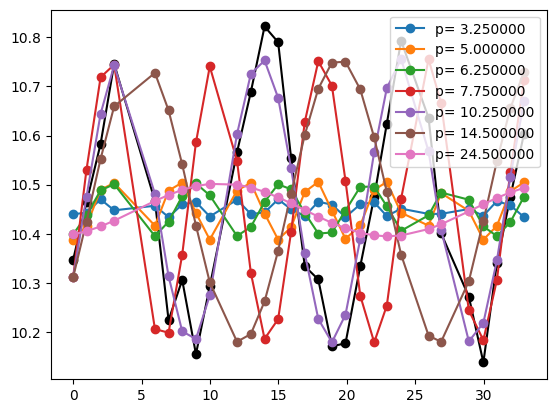

The period is 3.6348145772856424 days
The chi squared value is 3.750833170782351 the peak period is 3.5
The period is 4.7111705350668025 days
The chi squared value is 3.7933391300362844 the peak period is 5.0
The period is 7.4473021410231635 days
The chi squared value is 3.015756536835406 the peak period is 7.25
The period is 15.008671002151209 days
The chi squared value is 6.992816554393195 the peak period is 10.0
The period is 15.008678180766601 days
The chi squared value is 0.5156812386758237 the peak period is 15.0
The period is 15.00867127800385 days
The chi squared value is 7.466474273243536 the peak period is 26.25


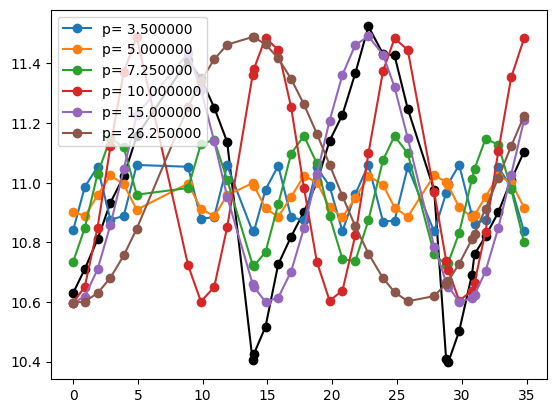

The period is 3.043281690109647 days
The chi squared value is 1.2909359863569543 the peak period is 3.25
The period is 5.125556916310746 days
The chi squared value is 1.2610975723360216 the peak period is 5.0
The period is 7.445813364222528 days
The chi squared value is 1.476749406176518 the peak period is 6.25
The period is 7.44582253080914 days
The chi squared value is 1.2074747688306704 the peak period is 7.75
The period is 15.64636737719721 days
The chi squared value is 2.2720839072839456 the peak period is 10.25
The period is 15.64636718114442 days
The chi squared value is 0.48918397218808685 the peak period is 14.5
The period is 9.360274588019 days
The chi squared value is 1.3605389142130468 the peak period is 24.5


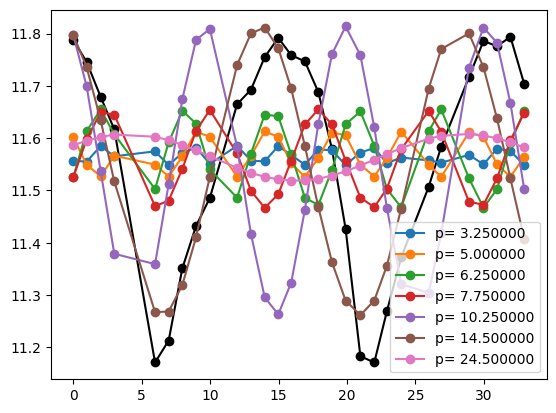

The period is 3.137196291249501 days
The chi squared value is 1.4804861719087663 the peak period is 3.25
The period is 4.692081114328498 days
The chi squared value is 1.4636156920538632 the peak period is 4.75
The period is 6.0661913268412215 days
The chi squared value is 3.42904506669048 the peak period is 7.0
The period is 8.861293577202773 days
The chi squared value is 1.4911599127921782 the peak period is 9.5
The period is 12.942265871589775 days
The chi squared value is 1.4674099364396203 the peak period is 13.0
The period is 23.186492489531705 days
The chi squared value is 1.4934222680928635 the peak period is 21.5


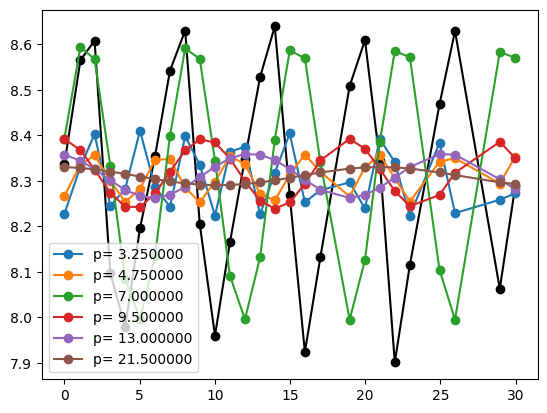

The period is 5.200409544303893 days
The chi squared value is 3.3277967850846886 the peak period is 4.25
The period is 5.200409775768486 days
The chi squared value is 0.8512470704411714 the peak period is 5.5
The period is 9.212395149800027 days
The chi squared value is 1.5192956095264096 the peak period is 7.75
The period is 9.213074293044134 days
The chi squared value is 1.5087390528861915 the peak period is 13.25


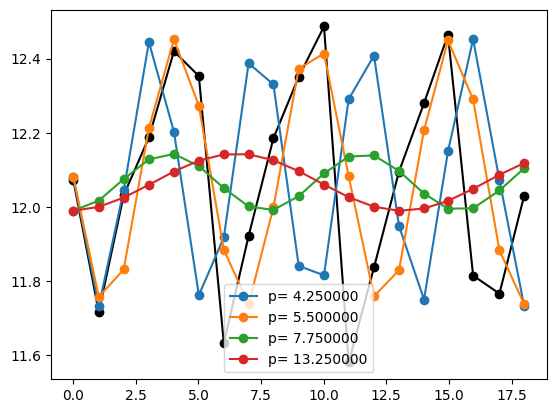

The period is 4.866091919128464 days
The chi squared value is 1.3720963183346253 the peak period is 4.25
The period is 4.8660912396301885 days
The chi squared value is 1.116116681456641 the peak period is 5.5
The period is 4.866090599968155 days
The chi squared value is 1.2395735870983235 the peak period is 8.0
The period is 11.52792805500797 days
The chi squared value is 0.6435330974981335 the peak period is 13.5


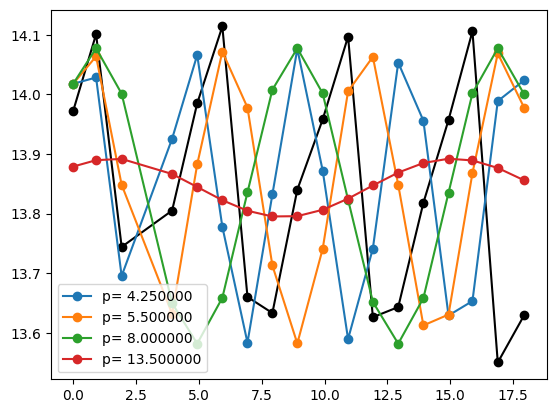

The period is 3.630166486784878 days
The chi squared value is 1.2114731130803036 the peak period is 3.5
The period is 5.252681575862268 days
The chi squared value is 1.1914656393619771 the peak period is 5.25
The period is 8.171553458986887 days
The chi squared value is 2.8938885718774565 the peak period is 6.75
The period is 8.17155173103311 days
The chi squared value is 2.715905550722688 the peak period is 9.5
The period is 8.171554160159879 days
The chi squared value is 3.0079882070455968 the peak period is 14.0
The period is 12.451005241527014 days
The chi squared value is 1.2658604151824049 the peak period is 23.5


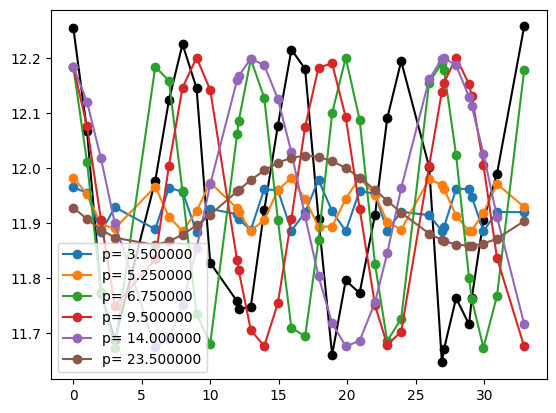

The period is 3.514266376726082 days
The chi squared value is 1.2376432507140005 the peak period is 3.5
The period is 4.7630840880703476 days
The chi squared value is 1.3604561409272897 the peak period is 4.75
The period is 6.3891340480248155 days
The chi squared value is 2.206845383604342 the peak period is 7.25
The period is 17.291181404218424 days
The chi squared value is 1.3669467239824205 the peak period is 17.0


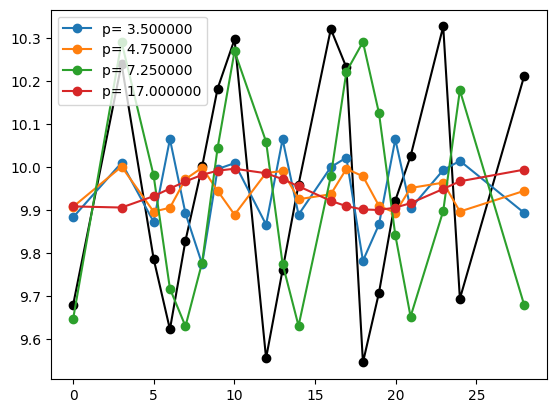

The period is 3.7946979136262815 days
The chi squared value is 1.4439410397060508 the peak period is 3.5
The period is 4.72595105493347 days
The chi squared value is 1.1930973074296374 the peak period is 5.0
The period is 5.801986002400222 days
The chi squared value is 1.2455638365140531 the peak period is 6.25
The period is 5.802042726372539 days
The chi squared value is 1.3882952617320556 the peak period is 7.75
The period is 11.63353391362709 days
The chi squared value is 0.0653503528418296 the peak period is 11.5
The period is 29.123482607961954 days
The chi squared value is 1.1774792253452993 the peak period is 22.25


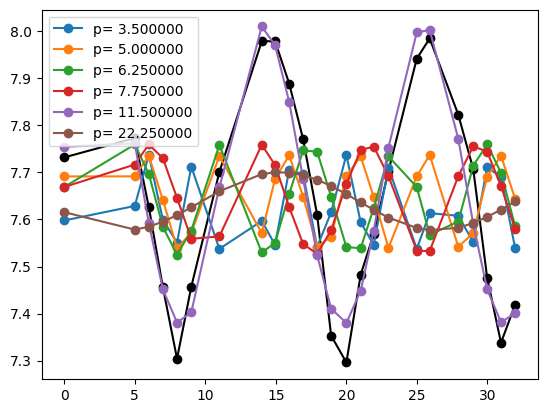

The period is 3.8835663162547194 days
The chi squared value is 3.573485789344411 the peak period is 3.5
The period is 6.501520367527292 days
The chi squared value is 3.2021447467297928 the peak period is 6.25
The period is 8.064402287766425 days
The chi squared value is 3.29686185137697 the peak period is 7.75
The period is 12.096396892736713 days
The chi squared value is 7.841567598989188 the peak period is 10.0
The period is 12.096398605021635 days
The chi squared value is 7.935219227029795 the peak period is 15.25
The period is 23.43580159126738 days
The chi squared value is 3.1613643588337133 the peak period is 23.75


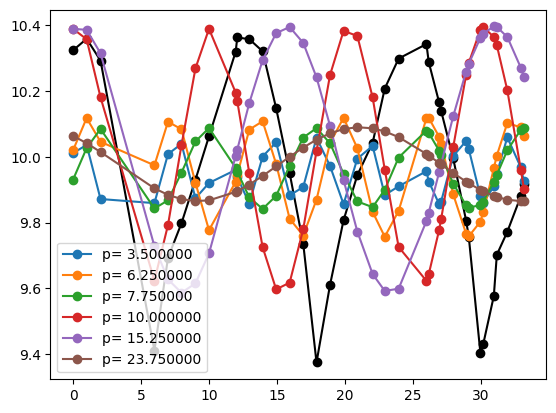

The period is 2.624776294513969 days
The chi squared value is 1.0315094599470158 the peak period is 3.5
The period is 5.38862625935119 days
The chi squared value is 1.6932322092196763 the peak period is 4.75
The period is 7.629250670679741 days
The chi squared value is 0.6525453702257897 the peak period is 7.25
The period is 173.63327933560302 days
The chi squared value is 108.40362415198496 the peak period is 18.25


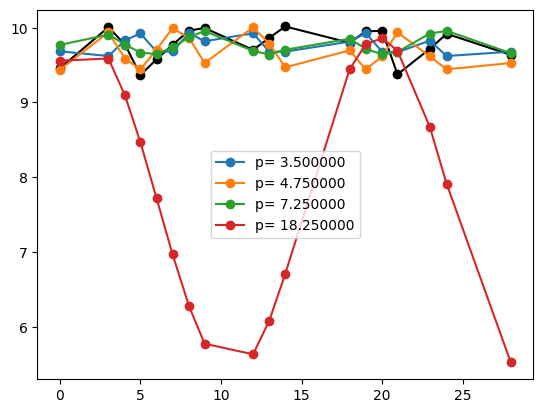

The period is 3.704103837162189 days
The chi squared value is 0.9980549446982873 the peak period is 3.25
The period is 5.818068883476173 days
The chi squared value is 1.0979961828271885 the peak period is 4.75
The period is 5.818070417490633 days
The chi squared value is 0.9099157510709119 the peak period is 6.0
The period is 9.994424244477335 days
The chi squared value is 1.1508849147267477 the peak period is 8.5
The period is 9.99442424021737 days
The chi squared value is 2.25335580374786 the peak period is 14.75


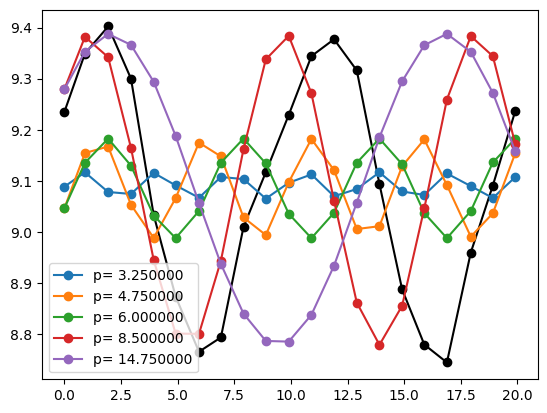

The period is 4.039506287849267 days
The chi squared value is 5.151472524396161 the peak period is 4.25
The period is 5.3402687294549676 days
The chi squared value is 2.711113255921677 the peak period is 6.5
The period is 8.302851873178803 days
The chi squared value is 2.6798872602422343 the peak period is 8.25
The period is 11.697149159137261 days
The chi squared value is 2.6897390350599824 the peak period is 11.25
The period is 20.59291720471399 days
The chi squared value is 2.8551108286242286 the peak period is 15.25
The period is 20.592848601773785 days
The chi squared value is 2.7479543648097713 the peak period is 25.25


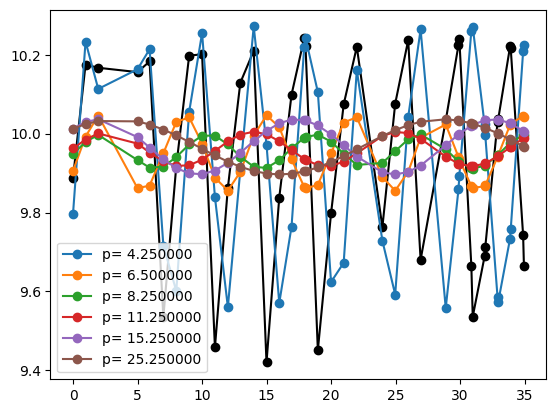

The period is 3.904895511484866 days
The chi squared value is 2.4535510346788527 the peak period is 4.0
The period is 5.275750305016986 days
The chi squared value is 3.0810055354322206 the peak period is 6.0
The period is 7.205153256054505 days
The chi squared value is 2.370249233885331 the peak period is 7.5
The period is 9.817998913020729 days
The chi squared value is 2.1835805456433186 the peak period is 9.75
The period is 16.74328022669879 days
The chi squared value is 1.6962297011888163 the peak period is 14.5
The period is 16.743287479575418 days
The chi squared value is 5.215885096346714 the peak period is 24.75


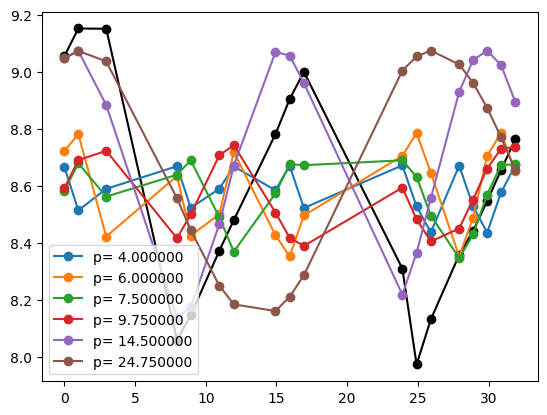

The period is 3.47119970808164 days
The chi squared value is 3.562282958552692 the peak period is 3.25
The period is 4.759641726422956 days
The chi squared value is 3.180061858748548 the peak period is 4.75
The period is 6.833392384711253 days
The chi squared value is 3.9156559676614613 the peak period is 7.75
The period is 13.671440874259597 days
The chi squared value is 8.266479255362242 the peak period is 10.5
The period is 13.671446780606862 days
The chi squared value is 2.989026841986246 the peak period is 15.25
The period is 90.01518295723444 days
The chi squared value is 6.2608438367482355 the peak period is 26.0


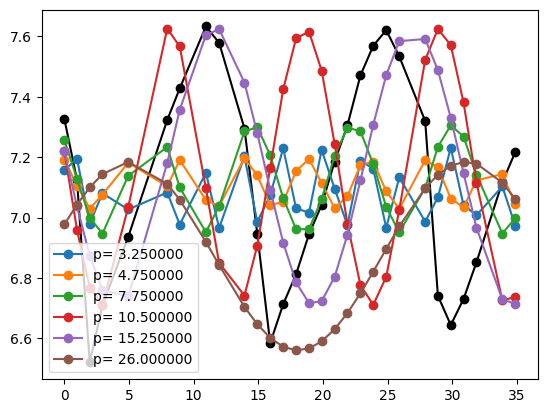

The period is 4.574898130758058 days
The chi squared value is 3.478697957200159 the peak period is 4.5
The period is 7.020473086250104 days
The chi squared value is 2.981010612036686 the peak period is 6.75
The period is 9.097783413504018 days
The chi squared value is 3.554302739639629 the peak period is 9.75
The period is 11.940244862753882 days
The chi squared value is 3.4772352039158614 the peak period is 12.5
The period is 15.542018654106739 days
The chi squared value is 3.510065324794609 the peak period is 17.25


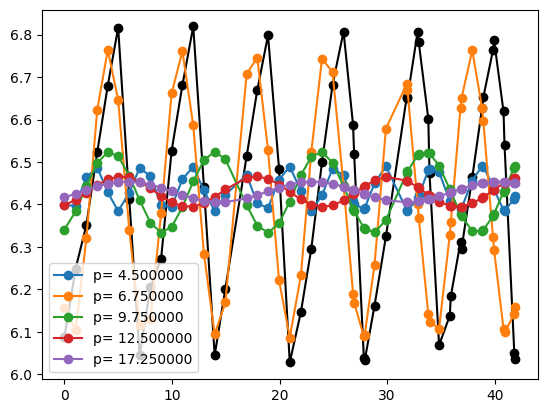

The period is 3.544767622063044 days
The chi squared value is 1.641875653127015 the peak period is 3.5
The period is 4.4742319531724535 days
The chi squared value is 1.8909290102622427 the peak period is 4.75
The period is 6.0815672425090215 days
The chi squared value is 2.510433311343812 the peak period is 6.5
The period is 7.9758509321656526 days
The chi squared value is 1.515310225943119 the peak period is 8.25
The period is 7.975823504016195 days
The chi squared value is 1.8087961774977341 the peak period is 11.0
The period is 22.744450228858362 days
The chi squared value is 1.4181404012915326 the peak period is 24.75


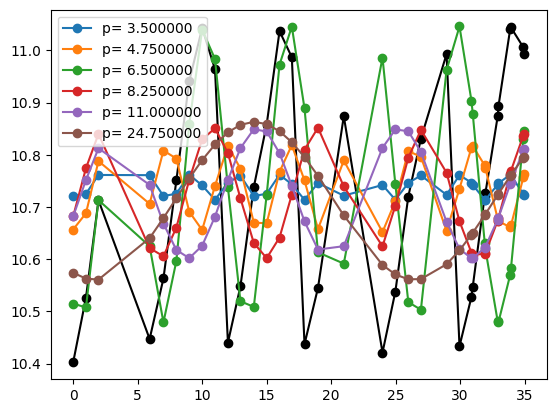

The period is 3.391448199143207 days
The chi squared value is 1.8560136416586515 the peak period is 3.25
The period is 5.723393019730532 days
The chi squared value is 1.8803901346345238 the peak period is 5.0
The period is 5.723380655092419 days
The chi squared value is 1.9543148864453999 the peak period is 6.25
The period is 8.15213558658436 days
The chi squared value is 1.768298406681361 the peak period is 7.75
The period is 8.152292228620675 days
The chi squared value is 1.9541354263927357 the peak period is 10.25
The period is 18.464121299833586 days
The chi squared value is 2.723372037554426 the peak period is 14.75
The period is 18.464119667415737 days
The chi squared value is 2.672007042234713 the peak period is 24.25


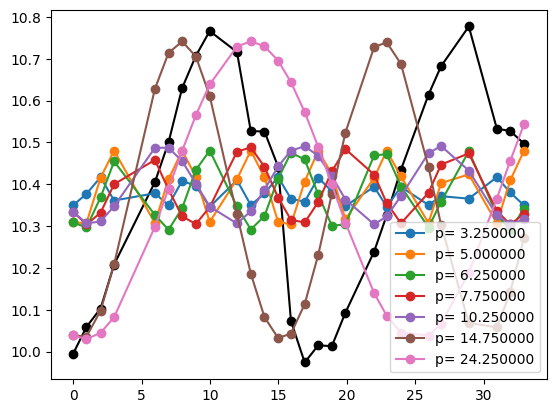

In [149]:
def func(t, m_v, phi,m_v0,P):
    return m_v0+m_v*(np.sin((2*np.pi*t/P) +phi))

chi_values = []

for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    
    plt.figure()
    plt.plot(relative_time, v_mag, 'o-', color = 'black')
    for i in peaks_periods:
        m_v = (np.max(v_mag)-np.min(v_mag)/2)
        m_v0 = (np.sum(v_mag)/v_mag.size)
        relative_time = (time - time[0])
        popt, _ = scipy.optimize.curve_fit(func, relative_time, v_mag, p0 = [m_v0,m_v,1,i], maxfev = 50000)
        print('The period is', popt[3], 'days')
        plt.plot(relative_time, func(relative_time, popt[0], popt[1], popt[2], i), 'o-', label = f'p= {i:2f}' )
        plt.legend()
        
        chi = np.sum((v_mag-func(relative_time, popt[0], popt[1], popt[2], i))**2)
        chi_values.append(chi)
        print('The chi squared value is', chi, 'the peak period is',i)
    
    plt.show()



        #plt.legend(['Ex Data', ])
    #plt.plot(time,func(time,popt[0],popt[1],popt[2],i))
        #for j in popt:
         #   sp.stats.chisquare((v_mag),func(time,popt[0],popt[1],popt[2],j))
        #  print(np.min(j))
        


In [146]:
print(chi_values)

[1.1814696574806045, 1.132989026179463, 1.157493300360931, 2.472460117604118, 0.10058671072637884, 2.934854128963366, 1.2428945736834758, 3.750833170782351, 3.7933391300362844, 3.015756536835406, 6.992816554393195, 0.5156812386758237, 7.466474273243536, 1.2909359863569543, 1.2610975723360216, 1.476749406176518, 1.2074747688306704, 2.2720839072839456, 0.48918397218808685, 1.3605389142130468, 1.4804861719087663, 1.4636156920538632, 3.42904506669048, 1.4911599127921782, 1.4674099364396203, 1.4934222680928635, 3.3277967850846886, 0.8512470704411714, 1.5192956095264096, 1.5087390528861915, 1.3720963183346253, 1.116116681456641, 1.2395735870983235, 0.6435330974981335, 1.2114731130803036, 1.1914656393619771, 2.8938885718774565, 2.715905550722688, 3.0079882070455968, 1.2658604151824049, 1.2376432507140005, 1.3604561409272897, 2.206845383604342, 1.3669467239824205, 1.4439410397060508, 1.1930973074296374, 1.2455638365140531, 1.3882952617320556, 0.0653503528418296, 1.1774792253452993, 3.573485789

In [9]:
print(time)

[47401.494  47402.4685 47403.4987 47404.4881 47407.4693 47408.4656
 47409.4616 47410.4654 47411.4759 47413.4681 47414.4786 47415.4801
 47416.4735 47417.4154 47418.4182 47419.4068 47420.4007 47421.3944
 47423.4931 47424.4125 47425.4581 47427.4678 47428.3866 47430.4132
 47432.4616 47433.4419 47434.4518]
